#### Observations
* 

In [1]:
#dependencies
import os
import requests
import json
import pandas as pd
import random
import numpy as np
from citipy import citipy
import gmaps
import matplotlib.pyplot as plt
from config import w_api

## Generate Cities List

In [2]:
# cities list
cities=[]
# latitude and longitude list
loc=[]

# crate random latitude and longitude locations
lat = np.random.uniform(low=-90,high=90.,size=1500)
lng= np.random.uniform(low=-180,high=180.,size=1500)

# combine them into a list
locs= zip(lat,lng)

# print(tuple(loc))


In [3]:
# pick cities closest to random locations
for loc in locs:
    city = citipy.nearest_city(loc[0],loc[1]).city_name
    
    # check if city is in list, if not, add it.
    if city not in cities:
        cities.append(city)

# confirm number of cities
len(cities)


628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# create url for requests
units="imperial"
api= f"&APPID={w_api}"
url = f"https://api.openweathermap.org/data/2.5/weather?{units}{api}"

# create list for data retreived from openweathermap
city_data =[]


# show data retrieval
print("Beginning Data Retrieval \n"     
    "-----------------------------")
set_count =1
record_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # try statement to skip cties that don't exist in data
    try:
        city_weather = requests.get(city_url).json()
        
    # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # add info to list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    except:
        print("City not found. Skipping...")
        pass
print("Data retrieval is complete.")


Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | constitucion
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | sao filipe
Processing Record 5 of Set 1 | mahadday weyne
City not found. Skipping...
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | port lincoln
Processing Record 11 of Set 1 | evensk
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | ucluelet
Processing Record 14 of Set 1 | okhotsk
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | sokoni
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | hopelchen
Processing Record 21 of Set 1 | tsalenjikha


Processing Record 35 of Set 4 | klaksvik
Processing Record 36 of Set 4 | north bend
Processing Record 37 of Set 4 | san cristobal
Processing Record 38 of Set 4 | melo
Processing Record 39 of Set 4 | pisco
Processing Record 40 of Set 4 | kaitangata
Processing Record 41 of Set 4 | flinders
Processing Record 42 of Set 4 | tangkak
Processing Record 43 of Set 4 | atar
Processing Record 44 of Set 4 | beroroha
Processing Record 45 of Set 4 | teguldet
Processing Record 46 of Set 4 | kavaratti
Processing Record 47 of Set 4 | atuona
Processing Record 48 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 49 of Set 4 | palmer
Processing Record 0 of Set 5 | fare
Processing Record 1 of Set 5 | te anau
Processing Record 2 of Set 5 | buenaventura
Processing Record 3 of Set 5 | ostrovnoy
Processing Record 4 of Set 5 | bredasdorp
Processing Record 5 of Set 5 | santa ana
Processing Record 6 of Set 5 | manzanillo
Processing Record 7 of Set 5 | magadan
Processing Record 8 of Set 5 | pay

Processing Record 24 of Set 8 | rawson
Processing Record 25 of Set 8 | ozernovskiy
Processing Record 26 of Set 8 | lamar
Processing Record 27 of Set 8 | mandiana
Processing Record 28 of Set 8 | qala
Processing Record 29 of Set 8 | lasa
Processing Record 30 of Set 8 | lavrentiya
Processing Record 31 of Set 8 | uruzgan
Processing Record 32 of Set 8 | aklavik
Processing Record 33 of Set 8 | grand baie
Processing Record 34 of Set 8 | kondagaon
Processing Record 35 of Set 8 | pontianak
Processing Record 36 of Set 8 | bua yai
Processing Record 37 of Set 8 | ayna
Processing Record 38 of Set 8 | aktau
Processing Record 39 of Set 8 | xiashi
Processing Record 40 of Set 8 | oyem
Processing Record 41 of Set 8 | man
Processing Record 42 of Set 8 | diego de almagro
Processing Record 43 of Set 8 | falealupo
City not found. Skipping...
Processing Record 44 of Set 8 | andevoranto
City not found. Skipping...
Processing Record 45 of Set 8 | marquette
Processing Record 46 of Set 8 | zhigansk
Processing Re

Processing Record 10 of Set 12 | lianran
Processing Record 11 of Set 12 | kirkwall
Processing Record 12 of Set 12 | peniche
Processing Record 13 of Set 12 | san quintin
Processing Record 14 of Set 12 | beloha
Processing Record 15 of Set 12 | maniitsoq
Processing Record 16 of Set 12 | namibe
Processing Record 17 of Set 12 | irpa irpa
Processing Record 18 of Set 12 | alibag
Processing Record 19 of Set 12 | buta
Processing Record 20 of Set 12 | kita
Processing Record 21 of Set 12 | riviere-au-renard
Processing Record 22 of Set 12 | mount isa
Processing Record 23 of Set 12 | kimbe
Processing Record 24 of Set 12 | furano
Processing Record 25 of Set 12 | barstow
Processing Record 26 of Set 12 | honningsvag
Processing Record 27 of Set 12 | altay
Processing Record 28 of Set 12 | nome
Processing Record 29 of Set 12 | sotouboua
Processing Record 30 of Set 12 | wanning
Processing Record 31 of Set 12 | riyadh
Processing Record 32 of Set 12 | denpasar
Processing Record 33 of Set 12 | lompoc
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:

# create data frame from requests
city_data_df= pd.DataFrame(city_data)



# Exports DataFrame as a csv file
city_data_df.to_csv("../output_data/city_data_df.csv",
                    encoding="utf-8", header=True)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,constitucion,-35.3333,-72.4167,283.84,84,100,4.68,CL,1655187122
1,lebu,-37.6167,-73.6500,283.36,92,100,6.41,CL,1655187074
2,port alfred,-33.5906,26.8910,293.81,53,100,0.89,ZA,1655186964
3,sao filipe,14.8961,-24.4956,296.47,74,81,6.29,CV,1655187125
4,tasiilaq,65.6145,-37.6368,276.24,98,100,7.67,GL,1655187042
5,ushuaia,-54.8000,-68.3000,277.96,81,20,7.20,AR,1655187017
6,albany,42.6001,-73.9662,288.38,84,83,1.89,US,1655186889
7,port lincoln,-34.7333,135.8667,289.52,77,38,11.71,AU,1655187131
8,evensk,61.9500,159.2333,283.44,67,1,4.45,RU,1655187133
9,barrow,71.2906,-156.7887,275.16,80,0,8.23,US,1655187012


In [24]:
# describe Humidty for count check and max value
city_data_df["Humidity"].describe()

count    573.000000
mean      67.567190
std       22.871435
min        3.000000
25%       53.000000
50%       73.000000
75%       85.000000
max      100.000000
Name: Humidity, dtype: float64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
#no cities over 100% humidity

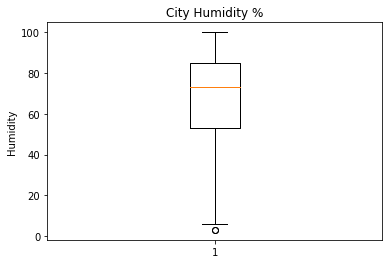

573

In [26]:
# Visual check of data for outliers
humidity_df = pd.read_csv("../output_data/city_data_df.csv")
humidity =humidity_df["Humidity"]

fig1, ax1 = plt.subplots()
ax1.set_title('City Humidity %')
ax1.set_ylabel("Humidity")
ax1.boxplot(humidity)
plt.show()
# count of values for comparision in next step
len(humidity_df)


In [27]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_df.drop(humidity_df["Humidity"], inplace=False)

# count of values for comparision
len (clean_city_data)



482

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

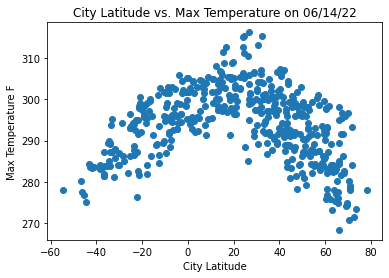

In [28]:
# Plot of Lat vs Max Temp
# import of time dependecie dates can be added to plots
import time

# Creation of scatter plot lat vs temp
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp']
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Max Temperature on "+ time.strftime("%x"))
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature F')
plt.show()

## Latitude vs. Humidity Plot

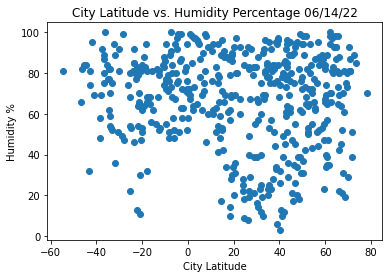

In [30]:
# Creation of scatter plot  lat vs humidity
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Humidity Percentage "+ time.strftime("%x"))
plt.xlabel('City Latitude')
plt.ylabel('Humidity %')
plt.show()

## Latitude vs. Cloudiness Plot

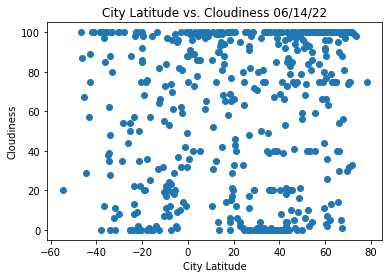

In [32]:
# Creation of scatter plot lat vs cloudiness
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

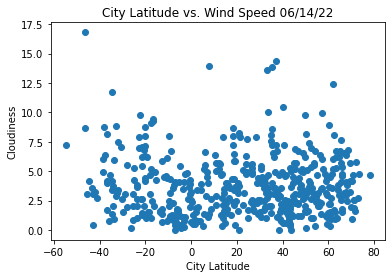

In [33]:
# Creation of scatter plot lat vs wind speed
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Linear Regression

In [14]:
# Create Northen and Southern Hemisphere DataFrames.
north_hemi_df = clean_city_data.loc[(city_data_df["Lat"] >= 0)]
south_hemi_df = clean_city_data.loc[(city_data_df["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.667118356714903


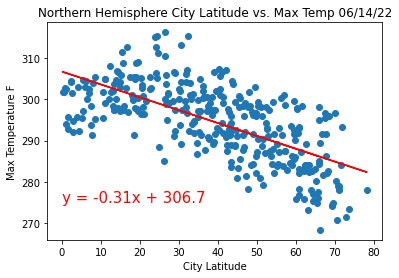

In [34]:
# import Lingress
from scipy.stats import linregress

# create scater plot with lat vs max temp plus linear regression
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Max Temp']

# linear regression calc and plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,275),fontsize=15,color="red")

# Labeling and r value
plt.title(f"Northern Hemisphere City Latitude vs. Max Temp "+ time.strftime("%x"))
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature F')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7432876292726871


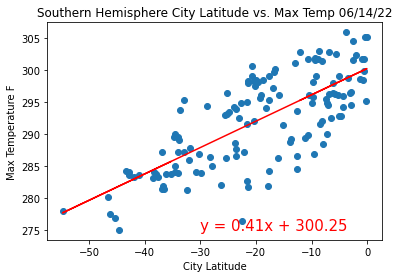

In [42]:
# create scater plot with lat vs max temp plus linear regression
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Max Temp']

# linear regression calc and plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,275),fontsize=15,color="red")

# Labeling and r value
plt.title(f"Southern Hemisphere City Latitude vs. Max Temp "+ time.strftime("%x"))
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature F')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0036010889938124634


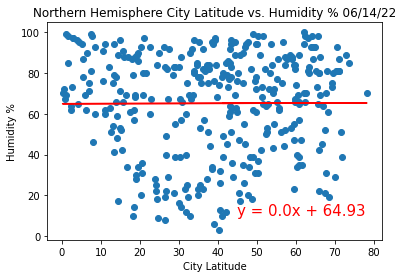

In [36]:
# create scater plot with lat vs humidity plus linear regression
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Humidity']

# linear regression calc and plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Labeling and r value
plt.title(f"Northern Hemisphere City Latitude vs. Humidity % "+ time.strftime("%x"))
plt.xlabel('City Latitude')
plt.ylabel('Humidity %')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0470640046635052


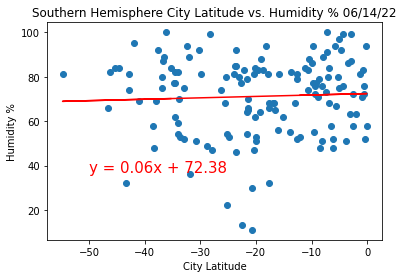

In [37]:
# create scater plot with lat vs humidity plus linear regression
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Humidity']

# linear regression calc and plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,37),fontsize=15,color="red")

# Labeling and r value
plt.title(f"Southern Hemisphere City Latitude vs. Humidity % "+ time.strftime("%x"))
plt.xlabel('City Latitude')
plt.ylabel('Humidity %')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05932777182306593


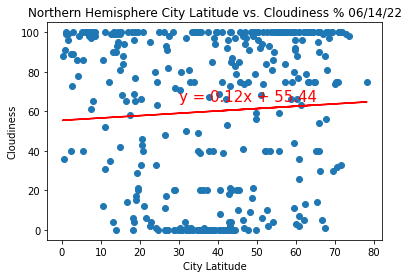

In [38]:
# create scater plot with lat vs Cloudiness plus linear regression
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Cloudiness']

# linear regression calc and plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,65),fontsize=15,color="red")

# Labeling and r value
plt.title(f"Northern Hemisphere City Latitude vs. Cloudiness % "+ time.strftime("%x"))
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.16884550040856658


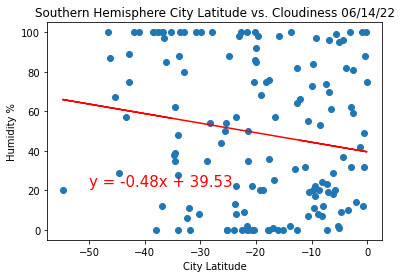

In [39]:
# create scater plot with lat vs Cloudiness plus linear regression
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Cloudiness']

# linear regression calc and plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,22),fontsize=15,color="red")

# Labeling and r value
plt.title(f"Southern Hemisphere City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.xlabel('City Latitude')
plt.ylabel('Humidity %')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04959307262325597


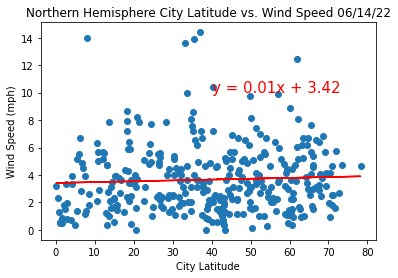

In [40]:
# create scater plot with lat vs Wind Speed plus linear regression
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Wind Speed']

# linear regression calc and plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Labeling and r value
plt.title(f"Northern Hemisphere City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.33950266088118525


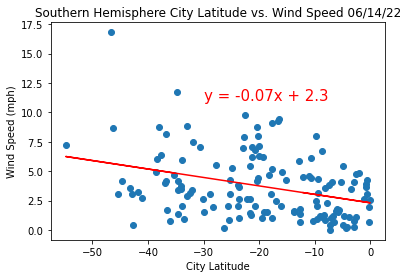

In [41]:
# create scater plot with lat vs Wind Speed plus linear regression
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Wind Speed']

# linear regression calc and plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,11),fontsize=15,color="red")

# Labeling and r value
plt.title(f"Southern Hemisphere City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.show()